# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [ ]:
# your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
sns.set(style='whitegrid', context='notebook')

# Load Excel (UCI file is typically named exactly as below)
path = 'Online Retail.xlsx'
df_raw = pd.read_excel(path)
df = df_raw.copy()
df.columns = [c.strip() for c in df.columns]

print(f"Raw shape: {df.shape}")
display(df.head(10))
df.info()


In [2]:
!pip install --upgrade seaborn
import seaborn as sns, matplotlib
print('Seaborn:', sns.__version__)
import sys; print(sys.version)


     |████████████████████████████████| 293 kB 25.9 MB/s            
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.
Seaborn: 0.10.1
3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]


In [3]:
# Parse dates
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Strip whitespace in common string columns
for col in ['InvoiceNo','StockCode','Description','Country']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# Tag cancellations
df['IsCancellation'] = df['InvoiceNo'].str.upper().str.startswith('C')

# Basic quality filters for KPI-ready subset
df_valid = df[
    (~df['IsCancellation']) &
    (df['Quantity'] > 0) &
    (df['UnitPrice'] > 0) &
    (df['InvoiceDate'].notna())
].copy()

# Revenue and time features
df_valid['Revenue'] = df_valid['Quantity'] * df_valid['UnitPrice']
df_valid['Year'] = df_valid['InvoiceDate'].dt.year
df_valid['Month'] = df_valid['InvoiceDate'].dt.month
df_valid['YearMonth'] = df_valid['InvoiceDate'].dt.to_period('M').astype(str)
df_valid['Weekday'] = df_valid['InvoiceDate'].dt.day_name()
df_valid['Hour'] = df_valid['InvoiceDate'].dt.hour

# Customer presence flag
df_valid['HasCustomer'] = df_valid['CustomerID'].notna()

print(f"KPI-ready shape: {df_valid.shape}")
print("Missing (raw):")
print(df.isna().sum().sort_values(ascending=False).head(10))
print("Duplicate rows (raw):", df.duplicated().sum())
display(df_valid.head())


KPI-ready shape: (530104, 16)
Missing (raw):
CustomerID        135080
IsCancellation         0
Country                0
UnitPrice              0
InvoiceDate            0
Quantity               0
Description            0
StockCode              0
InvoiceNo              0
dtype: int64
Duplicate rows (raw): 5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancellation,Revenue,Year,Month,YearMonth,Weekday,Hour,HasCustomer
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,"17,850.00",United Kingdom,False,15.30,2010,12,2010-12,Wednesday,8,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,False,20.34,2010,12,2010-12,Wednesday,8,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,"17,850.00",United Kingdom,False,22.00,2010,12,2010-12,Wednesday,8,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,False,20.34,2010,12,2010-12,Wednesday,8,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,False,20.34,2010,12,2010-12,Wednesday,8,True


In [4]:
n_rows, n_valid = len(df), len(df_valid)
print(f"Rows (raw): {n_rows:,} | Rows (valid for KPIs): {n_valid:,}")
print(f"CustomerID missing rate (raw): {df['CustomerID'].isna().mean():.2%}")

display(df_valid[['Quantity','UnitPrice','Revenue']].describe(percentiles=[.01,.05,.5,.95,.99]).T)
display(df_valid['Country'].value_counts().head(10))


Rows (raw): 541,909 | Rows (valid for KPIs): 530,104
CustomerID missing rate (raw): 24.93%


,count,mean,std,min,1%,5%,50%,95%,99%,max
Quantity,"530,104.00",10.54,155.52,1.00,1.00,1.00,3.00,30.00,100.00,"80,995.00"
UnitPrice,"530,104.00",3.91,35.92,0.00,0.29,0.42,2.08,9.95,16.98,"13,541.33"
Revenue,"530,104.00",20.12,270.36,0.00,0.55,1.25,9.90,59.70,183.60,"168,469.60"


United Kingdom    485123
Germany             9040
France              8407
EIRE                7890
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1966
Portugal            1501
Australia           1182
Name: Country, dtype: int64

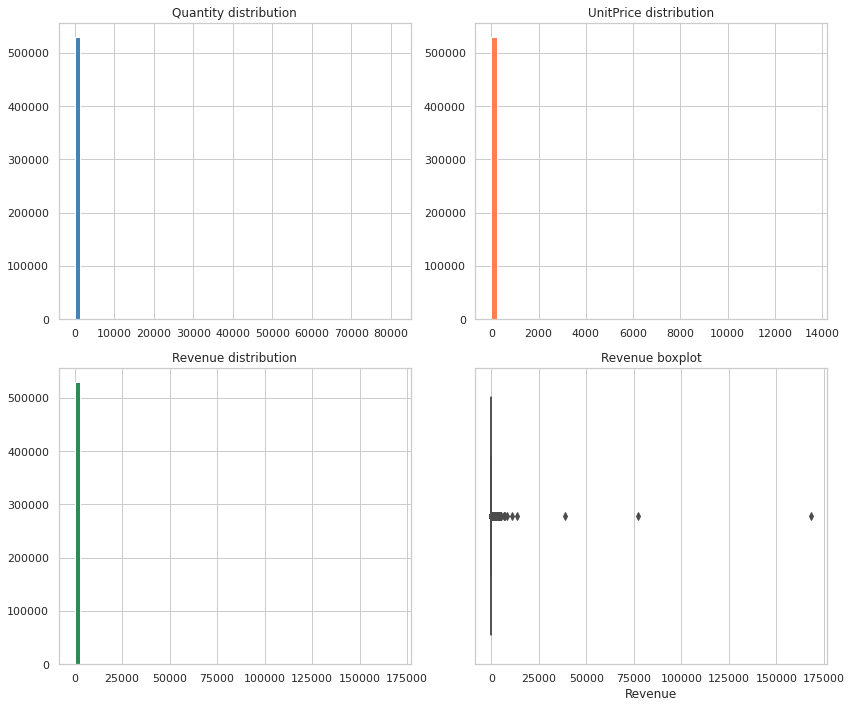

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes[0,0].hist(df_valid['Quantity'].dropna(), bins=60, color='steelblue', edgecolor='white'); axes[0,0].set_title('Quantity distribution')
axes[0,1].hist(df_valid['UnitPrice'].dropna(), bins=60, color='coral', edgecolor='white'); axes[0,1].set_title('UnitPrice distribution')
axes[1,0].hist(df_valid['Revenue'].dropna(), bins=60, color='seagreen', edgecolor='white'); axes[1,0].set_title('Revenue distribution')
sns.boxplot(x=df_valid['Revenue'], ax=axes[1,1]); axes[1,1].set_title('Revenue boxplot')
plt.tight_layout(); plt.show()


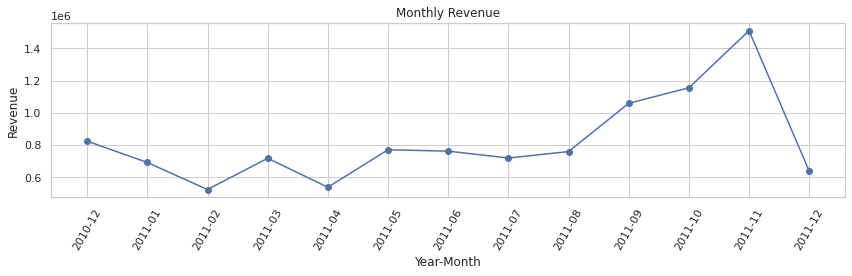

Top 5 months by revenue:


,YearMonth,Revenue
11,2011-11,"1,509,496.33"
10,2011-10,"1,154,979.30"
9,2011-09,"1,058,590.17"
0,2010-12,"823,746.14"
5,2011-05,"770,536.02"


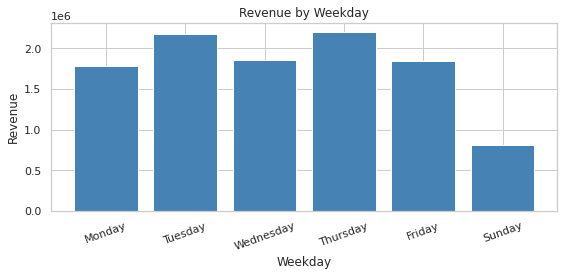

Weekday revenue (sorted Monday..Sunday):


,Weekday,Revenue
1,Monday,"1,779,575.04"
4,Tuesday,"2,178,632.61"
5,Wednesday,"1,851,147.81"
3,Thursday,"2,203,161.24"
0,Friday,"1,840,340.23"
2,Sunday,"813,827.61"


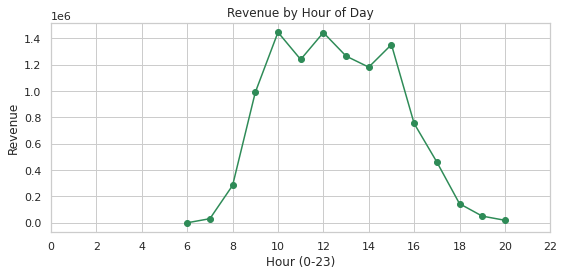

Hours with highest revenue:


,Hour,Revenue
4,10,"1,446,742.70"
6,12,"1,444,245.88"
9,15,"1,352,972.18"
7,13,"1,265,736.30"
5,11,"1,239,954.44"


In [7]:
# Ensure df_valid exists from earlier cleaning (non-cancellations, Quantity>0, UnitPrice>0, parsed InvoiceDate)
assert {'InvoiceDate','Quantity','UnitPrice'}.issubset(df_valid.columns), "Run cleaning cells before Task 5."

# If Revenue and time features are not present, create them
if 'Revenue' not in df_valid.columns:
    df_valid['Revenue'] = df_valid['Quantity'] * df_valid['UnitPrice']

if 'YearMonth' not in df_valid.columns:
    df_valid['YearMonth'] = df_valid['InvoiceDate'].dt.to_period('M').astype(str)

if 'Weekday' not in df_valid.columns:
    df_valid['Weekday'] = df_valid['InvoiceDate'].dt.day_name()

if 'Hour' not in df_valid.columns:
    df_valid['Hour'] = df_valid['InvoiceDate'].dt.hour

# Monthly revenue
monthly_rev = df_valid.groupby('YearMonth', as_index=False)['Revenue'].sum().sort_values('YearMonth')

plt.figure(figsize=(12,4))
plt.plot(monthly_rev['YearMonth'], monthly_rev['Revenue'], marker='o')
plt.xticks(rotation=60)
plt.title('Monthly Revenue')
plt.xlabel('Year-Month'); plt.ylabel('Revenue')
plt.tight_layout(); plt.show()

# Identify busiest months by revenue
top_months = monthly_rev.sort_values('Revenue', ascending=False).head(5)
print("Top 5 months by revenue:")
display(top_months)

# Weekday revenue (order Monday..Sunday)
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_rev = df_valid.groupby('Weekday', as_index=False)['Revenue'].sum()
weekday_rev['Weekday'] = pd.Categorical(weekday_rev['Weekday'], categories=weekday_order, ordered=True)
weekday_rev = weekday_rev.sort_values('Weekday')

plt.figure(figsize=(8,4))
plt.bar(weekday_rev['Weekday'], weekday_rev['Revenue'], color='steelblue')
plt.title('Revenue by Weekday'); plt.xlabel('Weekday'); plt.ylabel('Revenue')
plt.xticks(rotation=20)
plt.tight_layout(); plt.show()

print("Weekday revenue (sorted Monday..Sunday):")
display(weekday_rev)

# Hour-of-day revenue
hour_rev = df_valid.groupby('Hour', as_index=False)['Revenue'].sum().sort_values('Hour')

plt.figure(figsize=(8,4))
plt.plot(hour_rev['Hour'], hour_rev['Revenue'], marker='o', color='seagreen')
plt.title('Revenue by Hour of Day'); plt.xlabel('Hour (0-23)'); plt.ylabel('Revenue')
plt.xticks(range(0,24,2))
plt.tight_layout(); plt.show()

print("Hours with highest revenue:")
display(hour_rev.sort_values('Revenue', ascending=False).head(5))


In [8]:
# Ensure df_valid exists and includes non-cancelled, Quantity>0, UnitPrice>0
assert {'StockCode','Description','Country','Quantity','UnitPrice'}.issubset(df_valid.columns), "Run cleaning before Task 6."

# Revenue if not present yet
if 'Revenue' not in df_valid.columns:
    df_valid['Revenue'] = df_valid['Quantity'] * df_valid['UnitPrice']

# 1) Top products by Quantity (volume leaders)
prod_qty = (df_valid.groupby(['StockCode','Description'], as_index=False)
            .agg(Quantity=('Quantity','sum')))
top_prod_qty = prod_qty.sort_values('Quantity', ascending=False).head(15)
print("Top 15 products by Quantity:")
display(top_prod_qty)

# 2) Top products by Revenue (value leaders)
prod_rev = (df_valid.groupby(['StockCode','Description'], as_index=False)
            .agg(Revenue=('Revenue','sum')))
top_prod_rev = prod_rev.sort_values('Revenue', ascending=False).head(15)
print("Top 15 products by Revenue:")
display(top_prod_rev)

# 3) Top countries by Revenue
country_rev = df_valid.groupby('Country', as_index=False)['Revenue'].sum()
top_countries_rev = country_rev.sort_values('Revenue', ascending=False).head(15)
print("Top 15 countries by Revenue:")
display(top_countries_rev)

# Plots (matplotlib to avoid seaborn version issues)
import matplotlib.pyplot as plt

# Bar plot: Top products by Quantity
plt.figure(figsize=(10,6))
plt.barh(top_prod_qty['Description'][::-1], top_prod_qty['Quantity'][::-1], color='steelblue')
plt.title('Top 15 Products by Quantity'); plt.xlabel('Quantity'); plt.ylabel('')
plt.tight_layout(); plt.show()

# Bar plot: Top products by Revenue
plt.figure(figsize=(10,6))
plt.barh(top_prod_rev['Description'][::-1], top_prod_rev['Revenue'][::-1], color='seagreen')
plt.title('Top 15 Products by Revenue'); plt.xlabel('Revenue'); plt.ylabel('')
plt.tight_layout(); plt.show()

# Bar plot: Top countries by Revenue
plt.figure(figsize=(10,5))
plt.bar(top_countries_rev['Country'], top_countries_rev['Revenue'], color='coral')
plt.title('Top 15 Countries by Revenue'); plt.xlabel('Country'); plt.ylabel('Revenue')
plt.xticks(rotation=60)
plt.tight_layout(); plt.show()


Top 15 products by Quantity:


,Quantity
4157,m
4156,gift_0001_50
4155,gift_0001_40
4154,gift_0001_30
4153,gift_0001_20
4152,gift_0001_10
4151,S
4150,POST
4149,PADS
4148,M


Top 15 products by Revenue:


,Revenue
4157,m
4156,gift_0001_50
4155,gift_0001_40
4154,gift_0001_30
4153,gift_0001_20
4152,gift_0001_10
4151,S
4150,POST
4149,PADS
4148,M


Top 15 countries by Revenue:


,Country,Revenue
36,United Kingdom,"9,025,222.08"
24,Netherlands,"285,446.34"
10,EIRE,"283,453.96"
14,Germany,"228,867.14"
13,France,"209,715.11"
0,Australia,"138,521.31"
31,Spain,"61,577.11"
33,Switzerland,"57,089.90"
3,Belgium,"41,196.34"
32,Sweden,"38,378.33"


KeyError: 'Description'

<Figure size 720x432 with 0 Axes>

AttributeError: 'numpy.ndarray' object has no attribute 'boxplot'

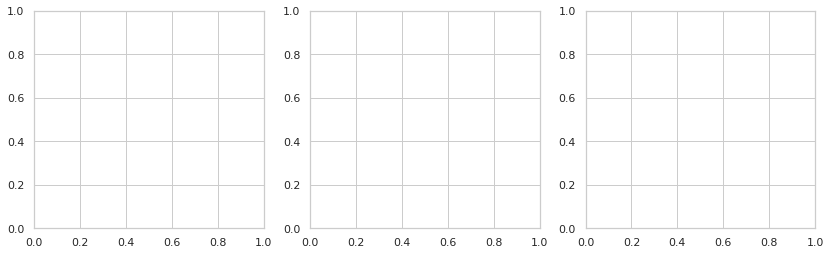

In [14]:
import matplotlib.pyplot as plt

# Option 1: direct 1D indexing
fig, axes = plt.subplots(1, 3, figsize=(14,4))

axes.boxplot(df_valid['Quantity'].dropna(), vert=False)
axes.set_title('Quantity boxplot')

axes[1].boxplot(df_valid['UnitPrice'].dropna(), vert=False)
axes[1].set_title('UnitPrice boxplot')

axes[2].boxplot(df_valid['Revenue'].dropna(), vert=False)
axes[2].set_title('Revenue boxplot')

plt.tight_layout()
plt.show()


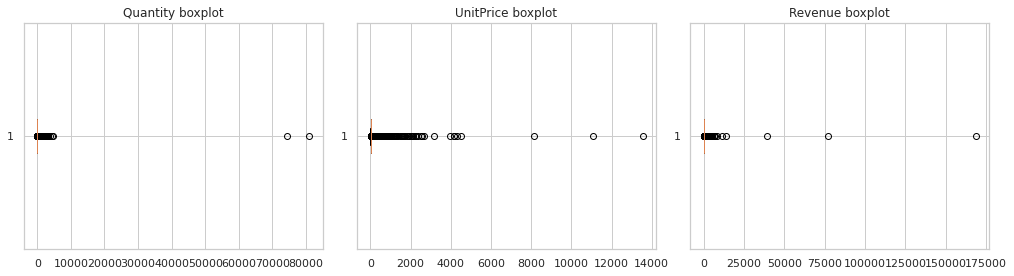

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
axes = axes.ravel()  # ensures 1D indexing even if grid changes

series_list = [df_valid['Quantity'], df_valid['UnitPrice'], df_valid['Revenue']]
titles = ['Quantity boxplot','UnitPrice boxplot','Revenue boxplot']

for ax, series, title in zip(axes, series_list, titles):
    ax.boxplot(series.dropna(), vert=False)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [15]:
summary = {
    "top_months_by_revenue": monthly_rev.sort_values("Revenue", ascending=False).head(3).to_dict("records"),
    "top_weekday_by_revenue": weekday_rev.sort_values("Revenue", ascending=False).head(1).to_dict("records"),
    "top_products_by_revenue": top_prod_rev.head(3).to_dict("records") if 'top_prod_rev' in globals() else None,
    "top_products_by_quantity": top_prod_qty.head(3).to_dict("records") if 'top_prod_qty' in globals() else None,
    "top_countries_by_revenue": top_countries_rev.head(3).to_dict("records") if 'top_countries_rev' in globals() else None,
    "total_revenue": float(df_valid['Revenue'].sum()),
    "unique_orders": int(df_valid['InvoiceNo'].nunique()),
    "unique_customers_non_null": int(df_valid['CustomerID'].nunique())
}
summary


{'top_months_by_revenue': [{'YearMonth': '2011-11',
   'Revenue': 1509496.329999743},
  {'YearMonth': '2011-10', 'Revenue': 1154979.2999999207},
  {'YearMonth': '2011-09', 'Revenue': 1058590.171999997}],
 'top_weekday_by_revenue': [{'Weekday': 'Thursday',
   'Revenue': 2203161.2399997725}],
 'top_products_by_revenue': [{'Revenue': 'm'},
  {'Revenue': 'gift_0001_50'},
  {'Revenue': 'gift_0001_40'}],
 'top_products_by_quantity': [{'Quantity': 'm'},
  {'Quantity': 'gift_0001_50'},
  {'Quantity': 'gift_0001_40'}],
 'top_countries_by_revenue': [{'Country': 'United Kingdom',
   'Revenue': 9025222.084002146},
  {'Country': 'Netherlands', 'Revenue': 285446.34},
  {'Country': 'EIRE', 'Revenue': 283453.9599999986}],
 'total_revenue': 10666684.544,
 'unique_orders': 19960,
 'unique_customers_non_null': 4338}